In [1]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
filename = 'images/fresh apple/1.35552.jpeg'

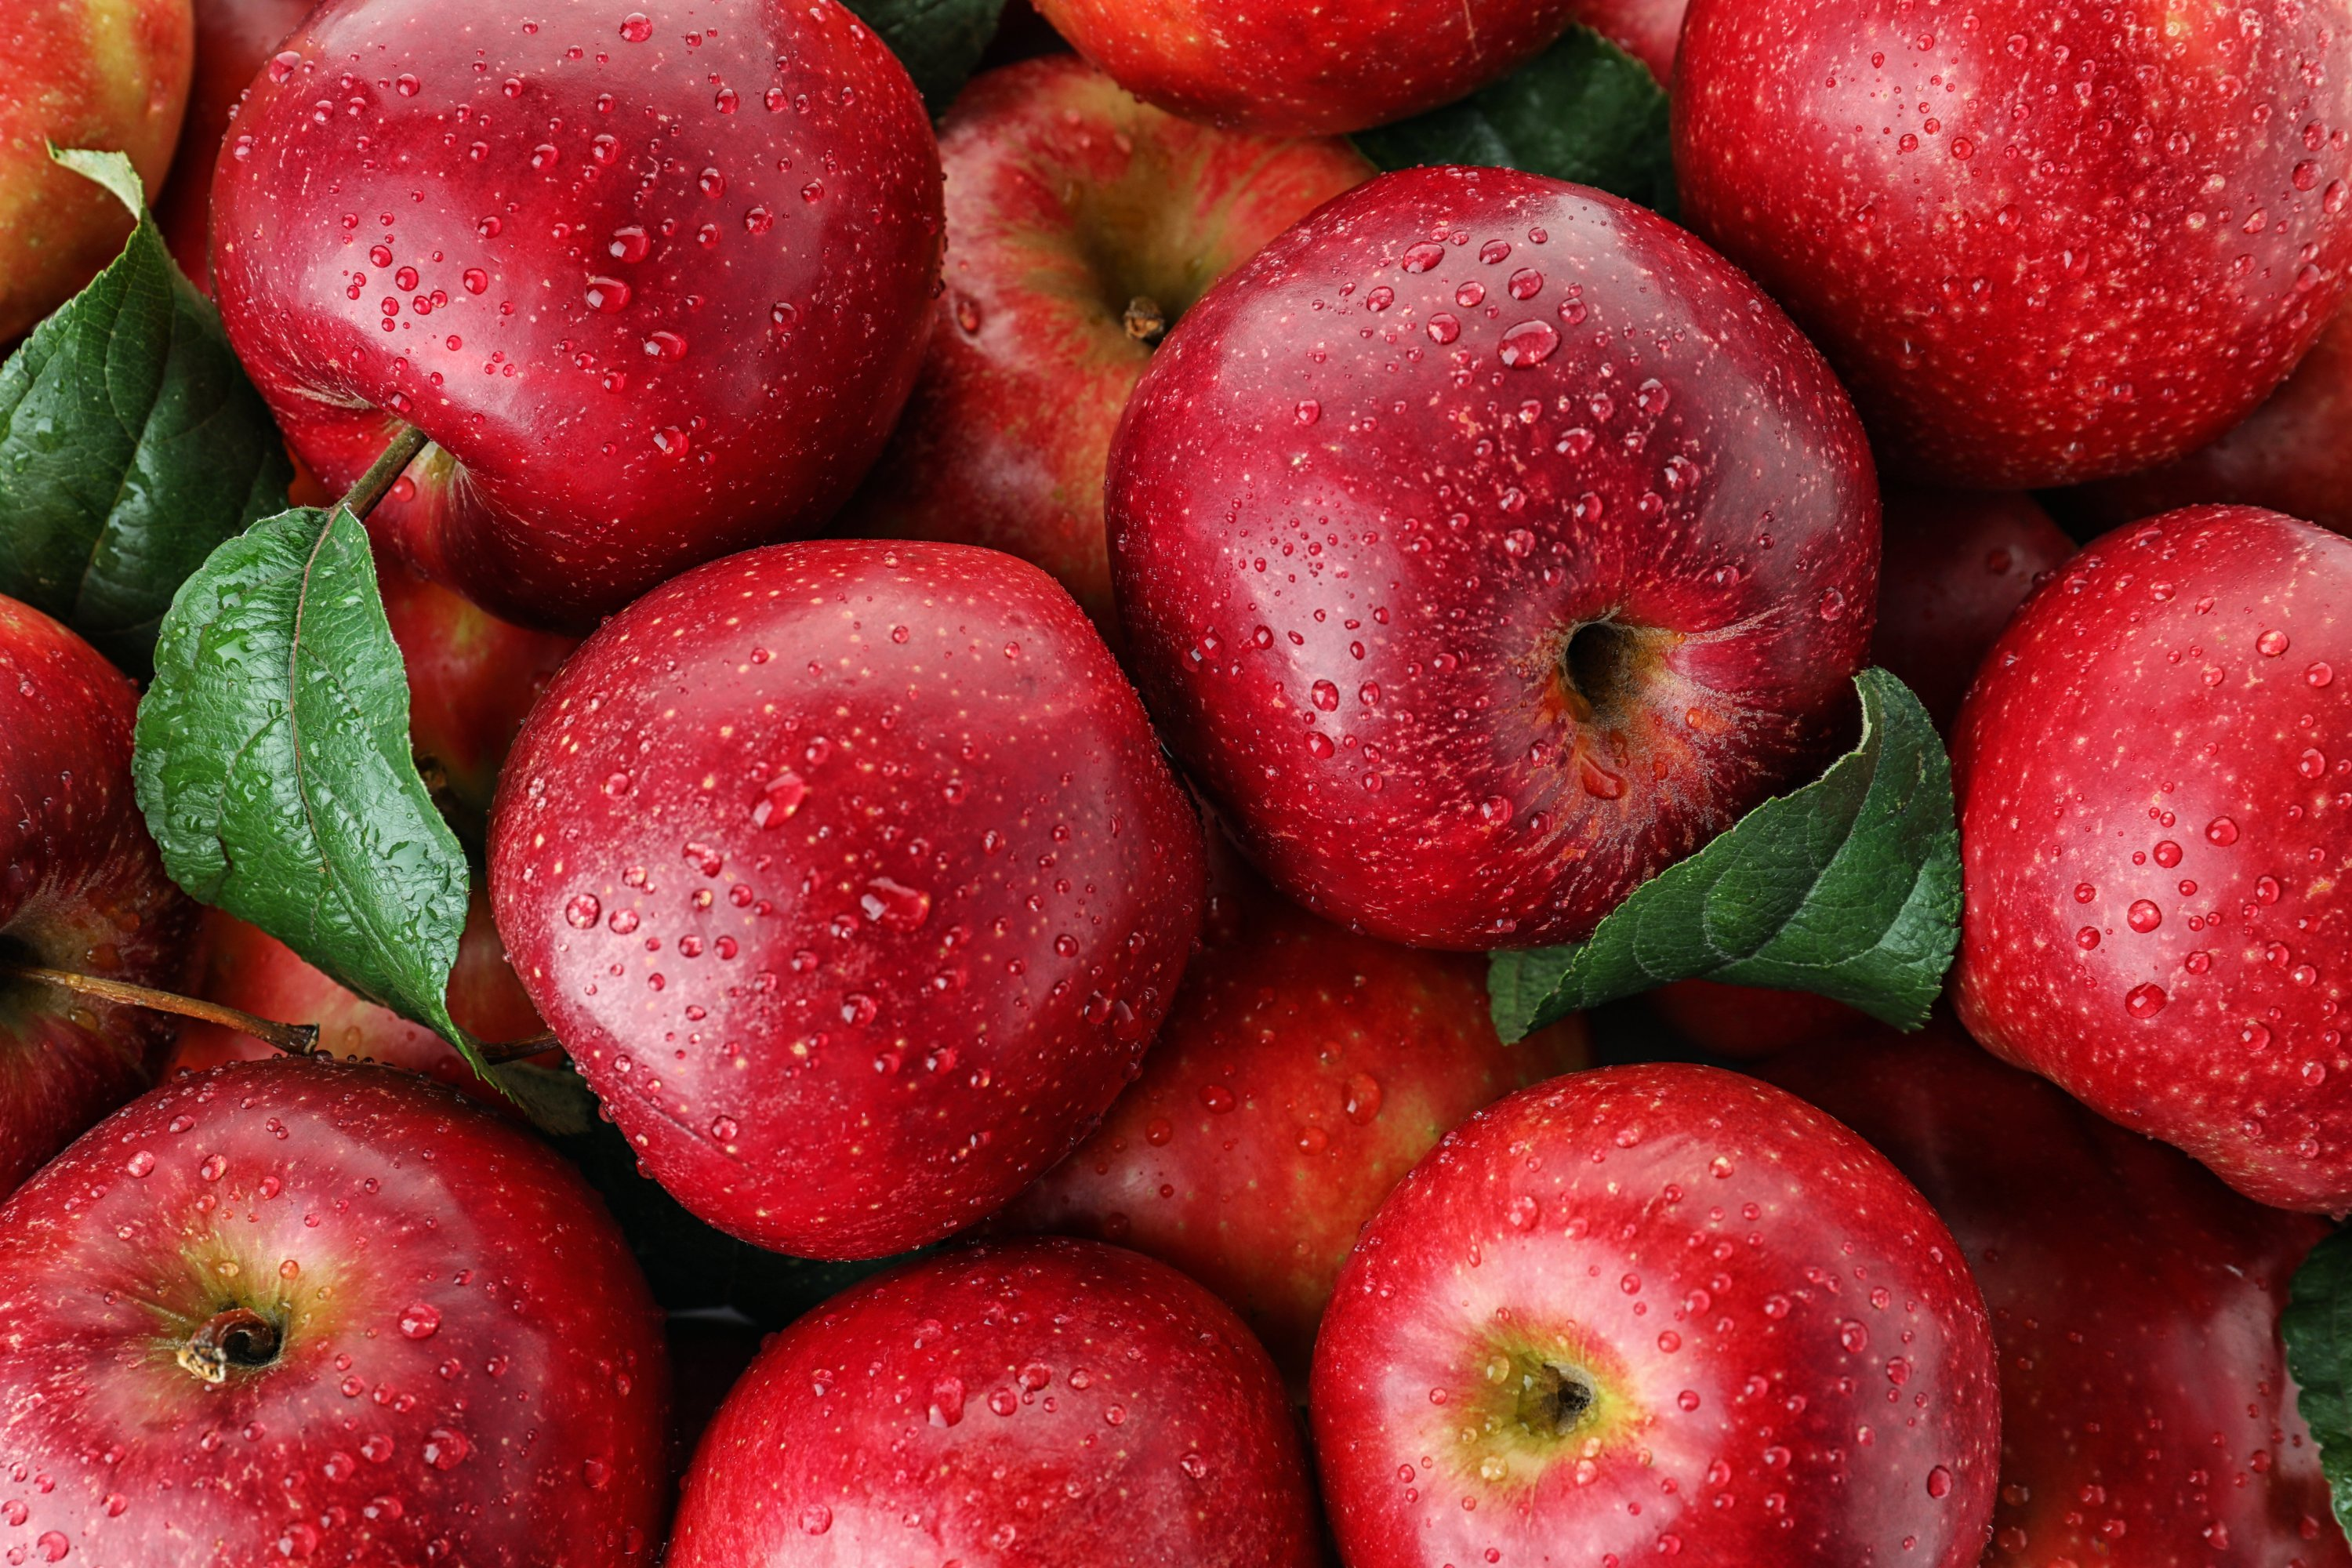

In [3]:
from IPython.display import Image
Image(filename, width=224, height=224)

In [4]:
img = image.load_img(filename, target_size= (224,224)) 

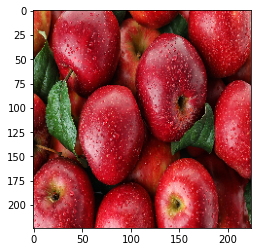

In [5]:
plt.imshow(img)

In [6]:
imgg = cv2.imread(filename)
imgg

array([[[ 69,  64, 223],
        [ 68,  64, 223],
        [ 68,  64, 223],
        ...,
        [155, 173, 232],
        [159, 179, 234],
        [162, 183, 235]],

       [[ 79,  74, 233],
        [ 74,  70, 229],
        [ 70,  66, 225],
        ...,
        [157, 175, 234],
        [162, 182, 237],
        [166, 187, 239]],

       [[ 91,  87, 243],
        [ 83,  80, 236],
        [ 74,  70, 229],
        ...,
        [159, 179, 236],
        [165, 187, 239],
        [170, 193, 243]],

       ...,

       [[187, 178, 241],
        [186, 176, 242],
        [184, 173, 243],
        ...,
        [  8,   6,  82],
        [  8,   7,  81],
        [  8,   7,  81]],

       [[186, 176, 242],
        [186, 175, 243],
        [185, 173, 245],
        ...,
        [  9,   7,  83],
        [  9,   8,  82],
        [  8,   7,  81]],

       [[187, 177, 243],
        [186, 175, 243],
        [185, 172, 246],
        ...,
        [ 11,   9,  85],
        [ 10,   9,  83],
        [ 10,   9,  83]]

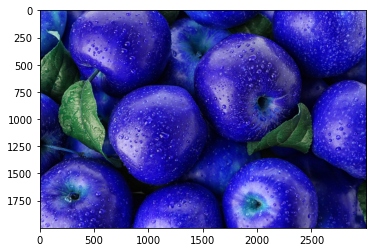

In [7]:
plt.imshow(imgg)

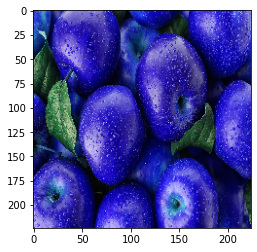

In [8]:
imgg = cv2.resize(imgg, (224,224))
plt.imshow(imgg)

In [9]:
from PIL import Image

In [10]:
im = Image.open(filename)
im = im.resize((224,224))

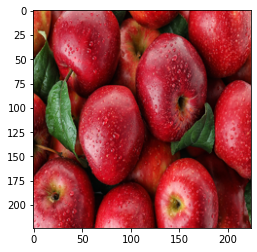

In [11]:
plt.imshow(im)

In [12]:
num_skipped = 0
for folder_name in ("fresh apple", "rotten apple"):
    folder_path = os.path.join("images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            #os.remove(fpath)
            
print("Deleted %d images" % num_skipped)

Deleted 221 images


In [12]:
image_size = (180,180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            "images",
            validation_split = 0.2,
            subset="training",
            seed=1337,
            image_size=image_size,
            batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            "images",
            validation_split = 0.2,
            subset="validation",
            seed=1337,
            image_size=image_size,
            batch_size=batch_size,
)

Found 7533 files belonging to 8 classes.
Using 6027 files for training.
Found 7533 files belonging to 8 classes.
Using 1506 files for validation.


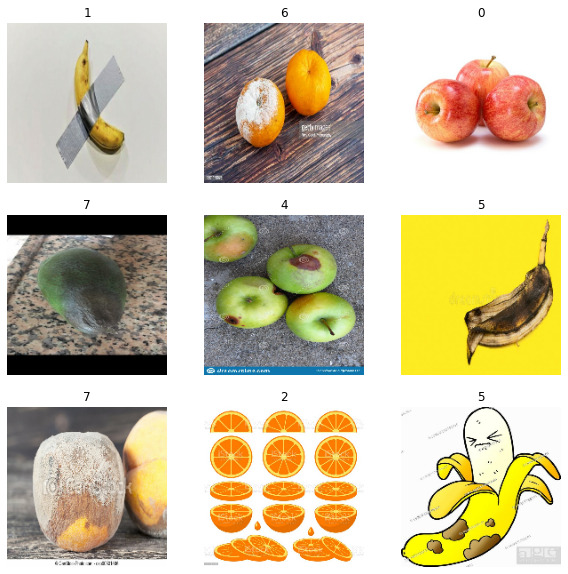

In [20]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

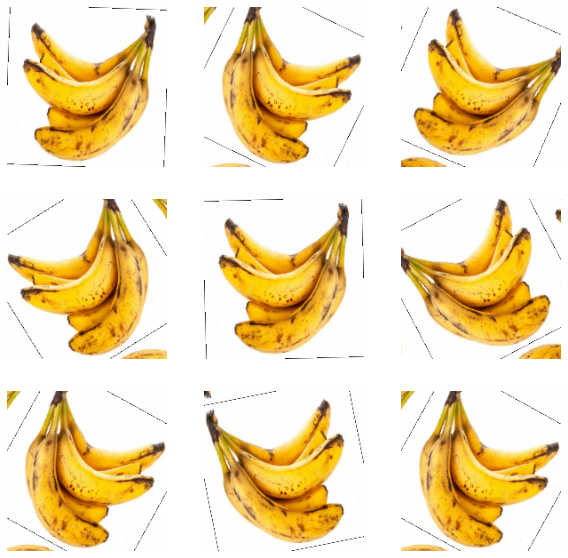

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[7].numpy().astype("uint8"))
        plt.axis("off")

In [33]:
#Option 1

inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)

NameError: name 'input_shape' is not defined

In [30]:
#Option 2

augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

NotImplementedError: in user code:

    <ipython-input-30-0683f3e173f4>:4 None  *
        lambda x, y: (data_augmentation(x, training=True), y)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:823 call
        lambda: inputs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\utils\tf_utils.py:65 smart_cond
        pred, true_fn=true_fn, false_fn=false_fn, name=name)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:818 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:722 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\array_ops.py:2747 wrapped
        tensor = fun(*args, **kwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\array_ops.py:2794 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\array_ops.py:2732 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:6 prod
        
    C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3031 prod
        keepdims=keepdims, initial=initial, where=where)
    C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\ops.py:848 __array__
        " a NumPy call, which is not supported".format(self.name))

    NotImplementedError: Cannot convert a symbolic Tensor (sequential/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [31]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [32]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    
    x = data_augmentation(inputs)

    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

      
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  
        previous_block_activation = x  

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

NotImplementedError: Cannot convert a symbolic Tensor (sequential/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [2]:
dir = 'images/'
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'fresh peach',
              'rotten apple', 'rotten banana', 'rotten orange', 'rotten peach']
data = []

In [3]:
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img = cv2.resize(pet_img,(64,64))    
            image = np.array(pet_img).flatten()

            data.append([image, label])
        except Exception as e:
            pass

In [4]:
print(len(data))

7619


In [5]:
import pickle

pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [6]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [7]:
import random

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [17]:
features

[array([106,  91, 107, ..., 151, 133,  29], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 211, 161, ...,  76,  97,  62], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([218, 217, 218, ..., 218, 218, 217], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([140, 142, 145, ...,  20,  17,  15], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([208, 208, 208, ..., 208, 208, 208], dtype=uint8),
 array([94, 84, 87, ..., 42, 28, 44], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([174, 174, 174, ..., 174, 174, 174], dtype=uint8),
 array([ 36,  37,  45, ..., 176, 166, 160], dtype=uint8),
 array([ 70, 110,  28, ...,  75,  59,  84], dtype=uint8),
 array([255, 255, 255, ..., 255,

In [18]:
labels

[1,
 6,
 1,
 0,
 3,
 5,
 0,
 0,
 0,
 7,
 1,
 1,
 2,
 5,
 1,
 7,
 7,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 6,
 1,
 5,
 0,
 7,
 1,
 5,
 0,
 5,
 0,
 5,
 0,
 2,
 0,
 5,
 5,
 4,
 1,
 4,
 0,
 1,
 6,
 1,
 3,
 1,
 7,
 5,
 4,
 5,
 2,
 7,
 6,
 5,
 0,
 0,
 2,
 0,
 6,
 2,
 3,
 5,
 7,
 2,
 0,
 3,
 0,
 1,
 3,
 6,
 2,
 3,
 7,
 1,
 1,
 0,
 1,
 4,
 2,
 5,
 2,
 6,
 3,
 4,
 4,
 1,
 5,
 2,
 5,
 3,
 2,
 2,
 2,
 1,
 4,
 4,
 3,
 4,
 1,
 5,
 0,
 2,
 6,
 1,
 1,
 1,
 5,
 6,
 2,
 6,
 5,
 1,
 4,
 3,
 0,
 0,
 1,
 5,
 7,
 0,
 3,
 5,
 2,
 6,
 5,
 2,
 0,
 3,
 5,
 1,
 1,
 2,
 2,
 7,
 6,
 2,
 3,
 3,
 2,
 5,
 0,
 1,
 5,
 0,
 3,
 1,
 0,
 2,
 3,
 5,
 7,
 0,
 5,
 0,
 3,
 3,
 3,
 5,
 6,
 1,
 0,
 3,
 2,
 4,
 0,
 5,
 4,
 2,
 4,
 5,
 2,
 5,
 5,
 5,
 3,
 1,
 6,
 5,
 4,
 4,
 3,
 7,
 3,
 1,
 6,
 0,
 5,
 6,
 7,
 2,
 2,
 3,
 6,
 0,
 4,
 3,
 2,
 4,
 3,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 2,
 3,
 2,
 3,
 5,
 1,
 0,
 1,
 3,
 7,
 1,
 1,
 0,
 0,
 2,
 3,
 1,
 3,
 5,
 6,
 2,
 2,
 1,
 5,
 1,
 5,
 4,
 2,
 0,
 5,
 7,
 7,
 2,
 1,
 7,
 1,
 3,
 0,
 5,
 2,
 4,


In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## SVM

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,
                                   labels,
                                   test_size=0.2)

In [85]:
from sklearn import svm

clf = svm.SVC(C=1, kernel='linear', gamma='auto') #Svm Classifier oluşturma
clf.fit(x_train, y_train) #Eğitim başlıyor

SVC(C=1, gamma='auto', kernel='linear')

In [86]:
#Test veri kümesini sınıflandırıcıya gönder
y_pred = clf.predict(x_test)
y_pred

array([7, 7, 1, ..., 2, 2, 0])

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[183   7   7  14   1   6   3   4]
 [ 11 215   3   5   5   8   1   5]
 [  5   7 184   8   4   0   4   0]
 [  9  11   6 176   5   0   3   7]
 [ 12   3   6  11 105   7   9  11]
 [  6  16   6   2  10 148   6   2]
 [ 12   6  10   8  16   1  90   7]
 [  7   9   4   7  16   4   9  51]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       225
           1       0.78      0.85      0.82       253
           2       0.81      0.87      0.84       212
           3       0.76      0.81      0.79       217
           4       0.65      0.64      0.64       164
           5       0.85      0.76      0.80       196
           6       0.72      0.60      0.65       150
           7       0.59      0.48      0.53       107

    accuracy                           0.76      1524
   macro avg       0.74      0.73      0.73      1524
weighted avg       0.75      0.76      0.75      1524

0.7559055118110236


In [71]:
pick = open('model.pickle','wb')
pickle.dump(clf, pick)
pick.close()

In [73]:
pick = open('model.pickle','rb')
clf = pickle.load(pick)
pick.close()

Prediction is:  rotten banana


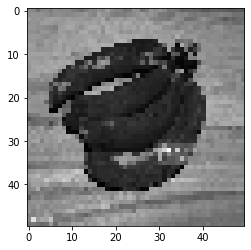

In [75]:
print('Prediction is: ', categories[y_pred[0]])

myfruit = x_test[0].reshape(50,50)
plt.imshow(myfruit, cmap='gray')
plt.show()

## Naive Bayes

In [100]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                   labels,
                                   test_size=0.25)

In [97]:
from sklearn import model_selection, naive_bayes

nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train, y_train)

In [102]:
#Test veri kümesini sınıflandırıcıya gönder
y_pred = nb.predict(x_test)
y_pred

array([6, 1, 7, ..., 1, 1, 2])

In [103]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[215  13  12  22  14   8   4  14]
 [ 22 272   9   6   7  10   4   2]
 [ 12   8 222   3   5   5   4   5]
 [ 14   8   6 188   9   6   4   8]
 [ 18  15   4  11 136  15  17   5]
 [ 14  19   8   8   3 173   6   4]
 [ 13   7   6  10  18   3 105   5]
 [ 13   6   7  14  17   8  10  66]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       302
           1       0.78      0.82      0.80       332
           2       0.81      0.84      0.83       264
           3       0.72      0.77      0.74       243
           4       0.65      0.62      0.63       221
           5       0.76      0.74      0.75       235
           6       0.68      0.63      0.65       167
           7       0.61      0.47      0.53       141

    accuracy                           0.72      1905
   macro avg       0.71      0.70      0.70      1905
weighted avg       0.72      0.72      0.72      1905

0.7228346456692913


## MLP

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                   labels,
                                   test_size=0.2)

In [99]:
from sklearn.neural_network import MLPClassifier

In [100]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,
                    activation='relu', solver='adam', random_state=1)
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [22]:
#Test veri kümesini sınıflandırıcıya gönder
y_pred = clf.predict(x_test)
y_pred

array([2, 4, 4, ..., 0, 2, 2])

In [23]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 49  41  28  23  41   5  11   4]
 [  1 171  28  10  17  16   7   1]
 [  7  31 135  15  17   8   1   0]
 [ 15  21  38  86  28  13   5   3]
 [ 11  18  23  12 105  10   4   6]
 [  5  45  26  16  34  70   5   2]
 [  6  15  28  10  32   8  22   1]
 [ 14  15  19  12  39  15   8  12]]
              precision    recall  f1-score   support

           0       0.45      0.24      0.32       202
           1       0.48      0.68      0.56       251
           2       0.42      0.63      0.50       214
           3       0.47      0.41      0.44       209
           4       0.34      0.56      0.42       189
           5       0.48      0.34      0.40       203
           6       0.35      0.18      0.24       122
           7       0.41      0.09      0.15       134

    accuracy                           0.43      1524
   macro avg       0.42      0.39      0.38      1524
weighted avg       0.43      0.43      0.40      1524

0.42650918635170604


## Data Processing for CNN

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                   labels,
                                   test_size=0.2)

In [105]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [39]:
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
x_test = np.expand_dims(x_test, -1)
y_test = np.expand_dims(y_test, -1)

In [174]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [207]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

6095
6095
1524
1524


In [ ]:
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

In [236]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [119]:
y_train

array([[3],
       [4],
       [6],
       ...,
       [6],
       [6],
       [0]])

In [212]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [213]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [242]:
x_train = x_train / 255
x_test = x_test / 255

In [243]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## CNN

In [32]:
from keras.models import Sequential #Model import
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout #Layers import

In [228]:
#Model oluşturma
model = Sequential() 

#İlk katmanı ekliyoruz
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(64,64,3)) )

#Havuz katmanı ekliyoruz
model.add( MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (5,5), activation='relu') )

model.add( MaxPooling2D(pool_size = (2,2)))

#Flatten katmanı
model.add(Flatten())

#256 nöron'lu katman ekliyoruz
model.add(Dense(256, activation='relu'))

#Makinemizin ezber yapmasını engellemek için drop out katmanı ekliyoruz
model.add(Dropout(0.5))

#128 nöron'lu katman ekliyoruz
model.add(Dense(128, activation='relu'))

#8 nöron'lu çıkış katmanı ekliyoruz çünkü 8 kategorimiz var
model.add(Dense(8, activation='softmax'))

In [229]:
#model derleme
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [162]:
#model eğitme
history = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_data=(x_test, y_test_one_hot))
##Daha doğru gradyan değeri hesaplaması için batch-size büyük verildi.
#Epoch: eğitim adımları

Epoch 1/10
196/196 [==============================] - 62s 314ms/step - loss: 1.6133 - accuracy: 0.4057 - val_loss: 1.3397 - val_accuracy: 0.5111
Epoch 2/10
196/196 [==============================] - 64s 328ms/step - loss: 1.2858 - accuracy: 0.5366 - val_loss: 1.1897 - val_accuracy: 0.5713
Epoch 3/10
196/196 [==============================] - 66s 336ms/step - loss: 1.1380 - accuracy: 0.5946 - val_loss: 1.1407 - val_accuracy: 0.5937
Epoch 4/10
196/196 [==============================] - 67s 341ms/step - loss: 1.0489 - accuracy: 0.6282 - val_loss: 1.0870 - val_accuracy: 0.6131
Epoch 5/10
196/196 [==============================] - 67s 340ms/step - loss: 0.9689 - accuracy: 0.6562 - val_loss: 0.9757 - val_accuracy: 0.6662
Epoch 6/10
196/196 [==============================] - 66s 337ms/step - loss: 0.9015 - accuracy: 0.6812 - val_loss: 0.9378 - val_accuracy: 0.6764
Epoch 7/10
196/196 [==============================] - 66s 336ms/step - loss: 0.8400 - accuracy: 0.7038 - val_loss: 0.9354 - val_ac

In [191]:
print('Accuracy: ', model.evaluate(x_test, y_test_one_hot)[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.8858 - accuracy: 0.6989
Accuracy:  0.6988999843597412


In [190]:
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 4s 14ms/step - loss: 0.8858 - accuracy: 0.6989


[0.8857926726341248, 0.6988999843597412]

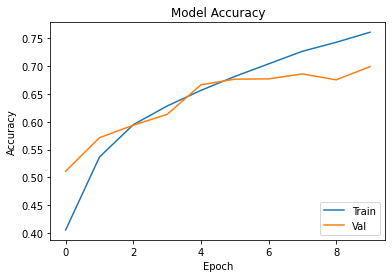

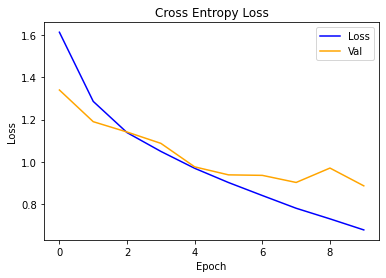

In [192]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val'], loc='upper right')
plt.show()

## LSTM

In [77]:
pip install numpy==1.20

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\hp\\anaconda3\\lib\\site-packages\\~-mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [32]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                   labels,
                                   test_size=0.2)

In [78]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [33]:
from numpy import array

def prep_pixels(train, test):

    train_norm = array(train).astype('float32')
    test_norm = array(test).astype('float32')

    train_norm = train_norm / 255.0
    test_norm = test_norm/ 255.0

    return train_norm, test_norm

In [34]:
x_train, x_test = prep_pixels(x_train, x_test)

In [39]:
from keras.optimizers import SGD
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(1, activation='relu', kernel_initializer='he_uniform', input_shape=(64,64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='softmax'))

In [ ]:
#model derleme
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [70]:
print('Accuracy: ', model.evaluate(x_test, y_test)[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1196 - accuracy: 0.5222
Accuracy:  0.5221999883651733


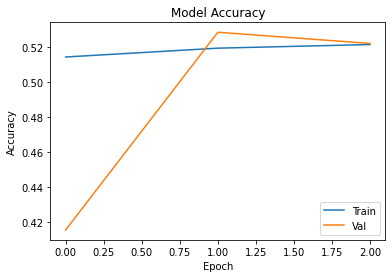

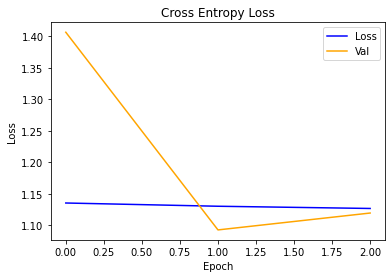

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val'], loc='upper right')
plt.show()